# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

632
['grand river south east', 'new norfolk', 'albany', 'kontagora', 'port elizabeth', 'vaini', 'amderma', 'soe', 'iqaluit', 'karratha', 'port alfred', 'rikitea', 'punta arenas', 'faanui', 'longyearbyen', 'chokurdakh', 'kapaa', 'hobart', 'tuktoyaktuk', 'busselton', 'broome', 'nizhniy tsasuchey', 'werda', 'hermanus', 'oyama', 'cape town', 'hithadhoo', 'dniprovka', 'asyut', 'jamestown', 'lolua', 'qaanaaq', 'fortuna foothills', 'mataura', 'pacific grove', 'bathsheba', 'sentyabrskiy', 'turukhansk', 'nyurba', 'saleaula', 'margate', 'severo-kurilsk', 'oudtshoorn', 'cedar city', 'souillac', 'east london', 'belushya guba', 'attawapiskat', 'upernavik', 'airai', 'metro', 'rolim de moura', 'ushuaia', 'suez', 'erenhot', 'nicoya', 'khatanga', 'micheweni', 'vostok', 'codrington', 'saskylakh', 'bethanien', 'georgetown', 'athabasca', 'richards bay', 'kirkkonummi', 'lebu', 'barrow', 'atuona', 'itarema', 'spornoye', 'nome', 'san patricio', 'adre', 'faya', 'cabo san lucas', 'longido', 'charters towers', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Get weather data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record_count = 0
set_count = 1

print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response['wind']['speed'])
        
        if record_count > 49:
            record_count = 1
            set_count += 1
            city_name.append(city)
        else:
            record_count +=1
            city_name.append(city)
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    except:
        print(f"City not found. Skipping...")
        
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | kontagora
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | vaini
City not found. Skipping...
Processing Record 6 of Set 1 | soe
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | nizhniy tsasuchey
Processing Record 21 of Set 1 | werda
Processing Record 22 of Set 1 

Processing Record 34 of Set 4 | troitskoye
Processing Record 35 of Set 4 | petauke
Processing Record 36 of Set 4 | castro
Processing Record 37 of Set 4 | taltal
Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | ilulissat
Processing Record 40 of Set 4 | surin
Processing Record 41 of Set 4 | shimoda
Processing Record 42 of Set 4 | payo
Processing Record 43 of Set 4 | black river
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | pierrelatte
Processing Record 46 of Set 4 | acaponeta
Processing Record 47 of Set 4 | raleigh
Processing Record 48 of Set 4 | wanlaweyn
Processing Record 49 of Set 4 | dunedin
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | neyshabur
Processing Record 2 of Set 5 | flin flon
Processing Record 3 of Set 5 | salalah
Processing Record 4 of Set 5 | cheyenne
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | anadyr
Processing Record 7 of Set 5 | ahipara
Processing Record 8 of Set 5 | b

Processing Record 16 of Set 8 | mapiripan
Processing Record 17 of Set 8 | obidos
Processing Record 18 of Set 8 | arraial do cabo
Processing Record 19 of Set 8 | hofn
City not found. Skipping...
Processing Record 20 of Set 8 | leland
Processing Record 21 of Set 8 | qasigiannguit
City not found. Skipping...
Processing Record 22 of Set 8 | miraflores
Processing Record 23 of Set 8 | don benito
Processing Record 24 of Set 8 | carleton place
Processing Record 25 of Set 8 | caravelas
Processing Record 26 of Set 8 | prince rupert
Processing Record 27 of Set 8 | marawi
City not found. Skipping...
Processing Record 28 of Set 8 | inhambane
Processing Record 29 of Set 8 | canton
Processing Record 30 of Set 8 | grindavik
Processing Record 31 of Set 8 | bereznik
Processing Record 32 of Set 8 | berlevag
City not found. Skipping...
Processing Record 33 of Set 8 | kirakira
Processing Record 34 of Set 8 | bambanglipuro
Processing Record 35 of Set 8 | omboue
Processing Record 36 of Set 8 | sisimiut
Proce

Processing Record 48 of Set 11 | nyuksenitsa
Processing Record 49 of Set 11 | khorramshahr
Processing Record 50 of Set 11 | baiquan
Processing Record 1 of Set 12 | grand gaube
Processing Record 2 of Set 12 | deputatskiy
Processing Record 3 of Set 12 | nouakchott
Processing Record 4 of Set 12 | mayor pablo lagerenza
Processing Record 5 of Set 12 | formosa
Processing Record 6 of Set 12 | ust-tsilma
Processing Record 7 of Set 12 | terrasini
City not found. Skipping...
Processing Record 8 of Set 12 | podgornoye
Processing Record 9 of Set 12 | zhigansk
Processing Record 10 of Set 12 | buluang
Processing Record 11 of Set 12 | trofaiach
-----------------------
Data Retrieval Complete
-----------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
summary_table_01 = pd.DataFrame({"City": city_name,
                                 "Cloudiness": cloudiness,
                                 "Country": country,
                                 "Date": date,
                                 "Humidity": humidity,
                                 "Lat": lat,
                                 "Lng": lng,
                                 "Max Temp": max_temp,
                                 "Wind Speed": wind_speed})

summary_table_01_csv = summary_table_01.to_csv('summary_table_01.csv',header = True)

summary_table_01.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,75,AU,1566852559,61,-42.78,147.06,51.01,10.29
1,albany,20,US,1566852468,36,42.65,-73.75,79.00,4.09
2,kontagora,69,NG,1566852685,90,10.40,5.47,73.63,3.31
3,port elizabeth,90,US,1566852686,68,39.31,-74.98,75.00,5.82
4,vaini,67,IN,1566852470,91,15.34,74.49,74.53,3.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

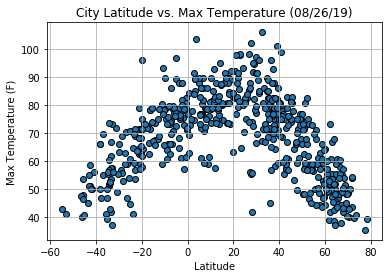

In [5]:
date_now = datetime.now()
today = date_now.strftime("%m/%d/%y")

# Build a scatter plot for each data type
plt.scatter(summary_table_01["Lat"], summary_table_01["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Output1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

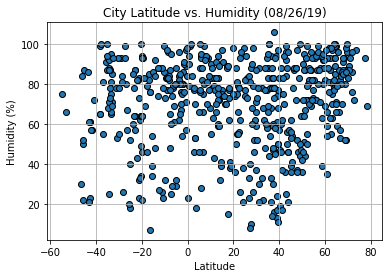

In [6]:
date_now = datetime.now()
today = date_now.strftime("%m/%d/%y")

# Build a scatter plot for each data type
plt.scatter(summary_table_01["Lat"], summary_table_01["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Output2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

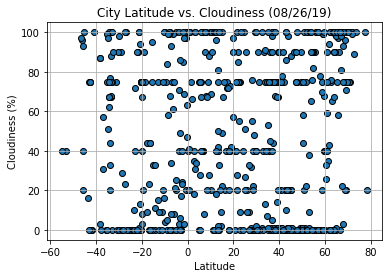

In [7]:
date_now = datetime.now()
today = date_now.strftime("%m/%d/%y")

# Build a scatter plot for each data type
plt.scatter(summary_table_01["Lat"], summary_table_01["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Output3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

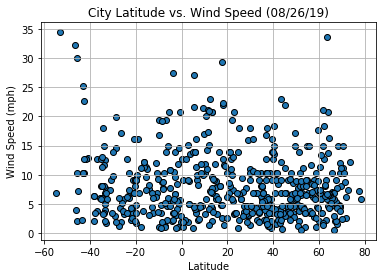

In [8]:
date_now = datetime.now()
today = date_now.strftime("%m/%d/%y")

# Build a scatter plot for each data type
plt.scatter(summary_table_01["Lat"], summary_table_01["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Output4.png")

# Show plot
plt.show()